In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


### Fetch data from sqlite3 to pandas dataframe

In [4]:
import sqlite3

conn = sqlite3.connect('../db.sqlite3')

In [6]:

FETCH_BOOK_QUERY = "SELECT `id`, `title`, `publisher`, `author`, `image`, `category_id`, `available` FROM `libraryapp_book` "

book_list = pd.read_sql_query(FETCH_BOOK_QUERY, conn)
book_list.head()

,id,title,publisher,author,image,category_id,available
0,5,DAA,suman,suuman,book/02_-_Python_e_Django.jpg.250x250_q85_crop...,2,0
1,6,DBA,ram,thapa,book/pos6.jpg,2,1
2,7,cryptography,ram,thapa,book/baag.jpg,1,1


In [11]:
book_category = pd.read_sql_query("SELECT `id` as `category_id`, `title` as `category_title`, `image` as `category_image` FROM `libraryapp_bookcategory`", conn)

book_category.head()

,category_id,category_title,category_image
0,1,interseting,bookcategory/download.jpeg
1,2,educational,bookcategory/e1.jpg


In [10]:
# rename book list dataframe columns
book_list = book_list.rename({'id':'book_id', 'title':'book_title', 'image':'book_image'}, axis=1)
# book_list.head()
print(book_list.columns)

,book_id,book_title,publisher,author,book_image,category_id,available
0,5,DAA,suman,suuman,book/02_-_Python_e_Django.jpg.250x250_q85_crop...,2,0
1,6,DBA,ram,thapa,book/pos6.jpg,2,1
2,7,cryptography,ram,thapa,book/baag.jpg,1,1


In [13]:
book_rating = pd.read_sql_query("SELECT `id`, `rating`, `book_id`, `user_id` from `libraryapp_bookrating` ", conn)
book_rating.head()

,id,rating,book_id,user_id
0,1,3,5,5
1,2,4,5,6
2,3,4,6,6
3,4,4,5,6
4,5,3,5,5


# Into Collabarative Filtering
---
### Merge book_list and book_rating

In [33]:
book_with_rating = pd.merge(book_list, book_rating, on='book_id')
book_with_rating

,book_id,book_title,publisher,author,book_image,category_id,available,id,rating,user_id
0,5,DAA,suman,suuman,book/02_-_Python_e_Django.jpg.250x250_q85_crop...,2,0,1,3,5
1,5,DAA,suman,suuman,book/02_-_Python_e_Django.jpg.250x250_q85_crop...,2,0,2,4,6
2,5,DAA,suman,suuman,book/02_-_Python_e_Django.jpg.250x250_q85_crop...,2,0,4,4,6
3,5,DAA,suman,suuman,book/02_-_Python_e_Django.jpg.250x250_q85_crop...,2,0,5,3,5
4,5,DAA,suman,suuman,book/02_-_Python_e_Django.jpg.250x250_q85_crop...,2,0,6,4,6
5,5,DAA,suman,suuman,book/02_-_Python_e_Django.jpg.250x250_q85_crop...,2,0,7,4,6
6,6,DBA,ram,thapa,book/pos6.jpg,2,1,3,4,6
7,7,cryptography,ram,thapa,book/baag.jpg,1,1,8,4,7


In [35]:
book_with_rating.groupby('book_title')['rating'].count()

book_title
DAA             6
DBA             1
cryptography    1
Name: rating, dtype: int64

In [56]:
ratings = pd.DataFrame(book_with_rating.groupby('book_title')['rating'].mean())
ratings['total_rating'] = pd.DataFrame(book_with_rating.groupby('book_title')['rating'].count())
ratings

,rating,total_rating
book_title,,
DAA,3.666667,6
DBA,4.000000,1
cryptography,4.000000,1


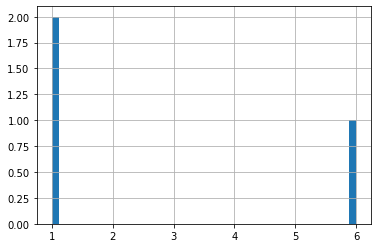

In [57]:
ratings['total_rating'].hist(bins=40);

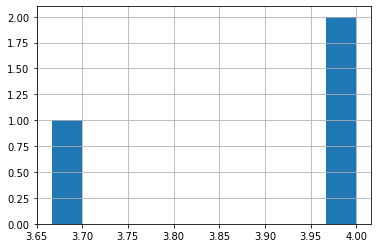

In [59]:
ratings['rating'].hist();

In [61]:
book_mat = book_with_rating.pivot_table(index='book_id',columns='book_title', values='rating')
book_mat

book_title,DAA,DBA,cryptography
book_id,,,
5,3.666667,NaN,NaN
6,NaN,4.0,NaN
7,NaN,NaN,4.0


In [62]:
len(book_mat.columns)

3

In [65]:
daa_rating = book_mat['DAA']
daa_rating.head()

book_id
5    3.666667
6         NaN
7         NaN
Name: DAA, dtype: float64

In [70]:
# find similar book
similar_to_daa = book_mat.corrwith(daa_rating)
corr_daa = pd.DataFrame(similar_to_daa, columns=['correlation'])
corr_daa.dropna(inplace = True)
corr_daa

/home/walker/development_tools/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2526: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/home/walker/development_tools/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


,correlation
book_title,


### Merge book_list and book_category

In [20]:
book_data = pd.merge(book_list, book_category, on='category_id')
book_data.head()

,book_id,book_title,publisher,author,book_image,category_id,available,category_title,category_image
0,5,DAA,suman,suuman,book/02_-_Python_e_Django.jpg.250x250_q85_crop...,2,0,educational,bookcategory/e1.jpg
1,6,DBA,ram,thapa,book/pos6.jpg,2,1,educational,bookcategory/e1.jpg
2,7,cryptography,ram,thapa,book/baag.jpg,1,1,interseting,bookcategory/download.jpeg


numpy.int64